# Clustering student into learning persona

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import  matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("students_cleaned.csv")

In [ ]:
features = ["comprehension", "attention", "focus", "retention", "engagement_time", "assessment_score"]
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
K_range = range(2, 10)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

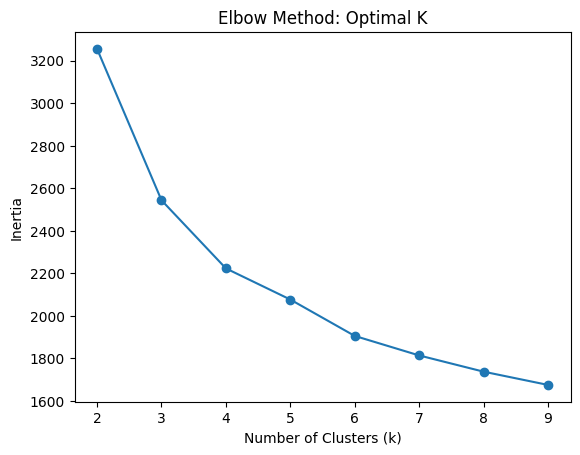

In [ ]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [ ]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["persona"] = kmeans.fit_predict(X_scaled)

In [ ]:
sil_score = silhouette_score(X_scaled, df["persona"])
print(f"Silhouette Score for k={k_optimal}: {sil_score:.3f}")


Silhouette Score for k=4: 0.209


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

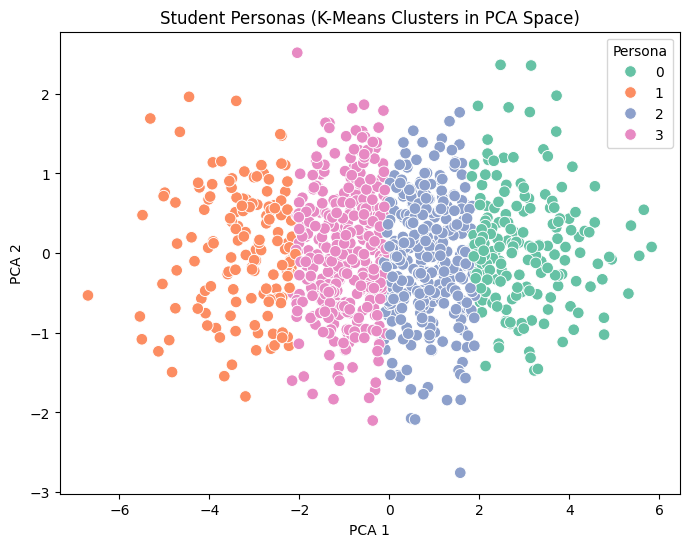

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["persona"], palette="Set2", s=70)
plt.title("Student Personas (K-Means Clusters in PCA Space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Persona")
plt.show()

In [ ]:
persona_summary = df.groupby("persona")[features].mean().round(2)
print("\n📚 Persona Cognitive & Performance Profiles:")
print(persona_summary)


📚 Persona Cognitive & Performance Profiles:
         comprehension  attention  focus  retention  engagement_time  \
persona                                                                
0                84.97      85.43  84.83      83.96            88.07   
1                52.99      53.58  51.81      53.22            51.81   
2                75.04      74.37  74.15      73.38            73.39   
3                63.72      64.82  64.82      64.58            63.31   

         assessment_score  
persona                    
0                   85.04  
1                   52.39  
2                   74.76  
3                   64.77  


In [ ]:
df.to_csv("student_personas.csv", index=False)
print("\n✅ Student personas saved as 'student_personas.csv'")


✅ Student personas saved as 'student_personas.csv'


Silhouette Score for k=4: 0.209

📚 Persona Profiles with Names:
   cluster                     persona_name  comprehension  attention  focus  \
0        0  🌟 Highly Engaged High Performer          84.97      85.43  84.83   
1        1            💤 Low Engagement Risk          52.99      53.58  51.81   
2        2             📈 Consistent Learner          75.01      74.36  74.15   
3        3           📚 Developing Performer          63.72      64.80  64.80   

   retention  engagement_time  assessment_score  
0      83.96            88.07             85.04  
1      53.22            51.81             52.39  
2      73.35            73.36             74.77  
3      64.58            63.31             64.73  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


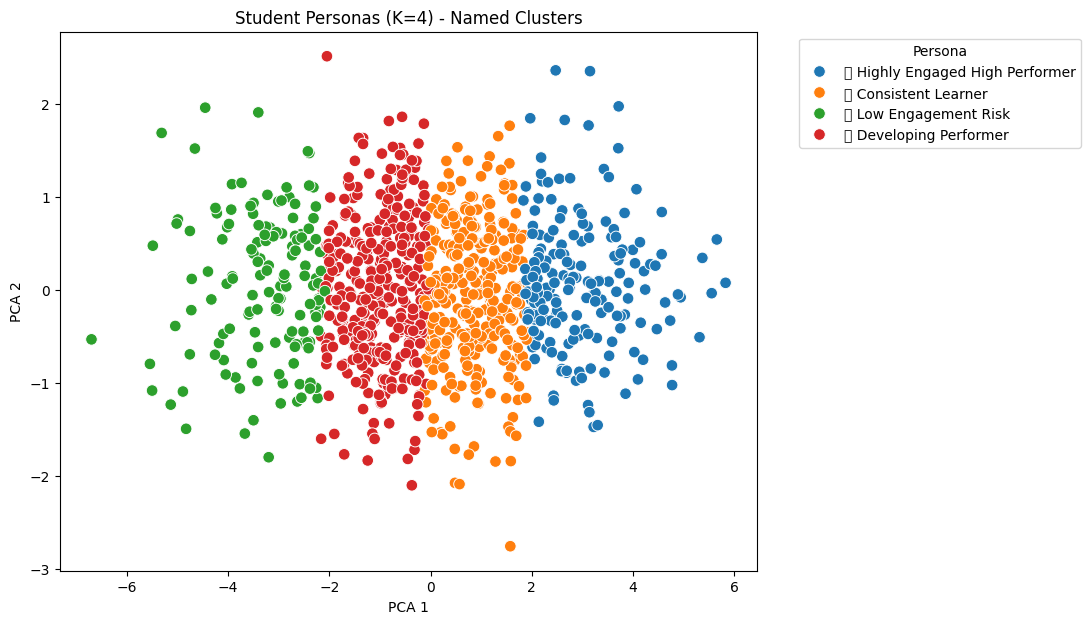


✅ Student personas with names saved as 'student_personas_named.csv'


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

# --- 📌 1. Feature Selection & Scaling ---
features = ["comprehension", "attention", "focus", "retention", "engagement_time", "assessment_score"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 📌 2. Fit K-Means with k=4 ---
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["persona"] = kmeans.fit_predict(X_scaled)

# --- 📌 3. Evaluate Clustering ---
sil_score = silhouette_score(X_scaled, df["persona"])
print(f"Silhouette Score for k={k_optimal}: {sil_score:.3f}")

# --- 📌 4. Persona Profiles ---
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
persona_summary = pd.DataFrame(cluster_centers, columns=features).round(2)
persona_summary["cluster"] = persona_summary.index

# --- 📌 5. Automatic Naming Logic ---
# Rank clusters by assessment_score and engagement_time
score_ranks = persona_summary["assessment_score"].rank()
engage_ranks = persona_summary["engagement_time"].rank()

names = []
for i, row in persona_summary.iterrows():
    if row["assessment_score"] > np.percentile(persona_summary["assessment_score"], 75) and \
       row["engagement_time"] > np.percentile(persona_summary["engagement_time"], 75):
        names.append("🌟 Highly Engaged High Performer")
    elif row["assessment_score"] > np.percentile(persona_summary["assessment_score"], 50):
        names.append("📈 Consistent Learner")
    elif row["engagement_time"] < np.percentile(persona_summary["engagement_time"], 25):
        names.append("💤 Low Engagement Risk")
    else:
        names.append("📚 Developing Performer")

persona_summary["persona_name"] = names

# Map cluster IDs to names in the dataframe
cluster_name_map = dict(zip(persona_summary["cluster"], persona_summary["persona_name"]))
df["persona_name"] = df["persona"].map(cluster_name_map)

print("\n📚 Persona Profiles with Names:")
print(persona_summary[["cluster", "persona_name"] + features])

# --- 📌 6. Visualize Clusters (PCA Projection) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["persona_name"], palette="tab10", s=70)
plt.title("Student Personas (K=4) - Named Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Persona", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- 📌 7. Export with Named Personas ---
df.to_csv("student_personas_named.csv", index=False)
print("\n✅ Student personas with names saved as 'student_personas_named.csv'")
